In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from IPython.display import IFrame


plt.figure(figsize = (12,9))
sns.set_theme(style="ticks")
sns.set_palette("Set1", 8, .75)
sns.set_context("talk", rc={"lines.linewidth": 2})

<Figure size 864x648 with 0 Axes>

### Let's load the cleaned data.

In [2]:
feature1 = pd.read_csv('./datasets/df_train_cleaned.csv')

In [3]:
#let's look at our data again. 
feature1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2038 entries, 0 to 2037
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ms_subclass              2038 non-null   int64  
 1   lot_frontage             2038 non-null   float64
 2   lot_area                 2038 non-null   int64  
 3   lot_shape                2038 non-null   int64  
 4   utilities                2038 non-null   int64  
 5   neighborhood             2038 non-null   int64  
 6   overall_qual             2038 non-null   int64  
 7   overall_cond             2038 non-null   int64  
 8   year_remod/add           2038 non-null   int64  
 9   mas_vnr_area             2038 non-null   float64
 10  exter_qual               2038 non-null   int64  
 11  exter_cond               2038 non-null   int64  
 12  bsmt_exposure            2038 non-null   int64  
 13  total_bsmt_sf            2038 non-null   float64
 14  heating_qc              

In [4]:
feature1.shape

(2038, 47)

In [5]:
feature1.describe().T

,count,mean,std,min,25%,50%,75%,max
ms_subclass,2038.0,57.127085,42.905372,20.0,20.00,50.0000,70.00,190.0
lot_frontage,2038.0,68.963796,21.261635,21.0,60.00,69.0552,78.00,313.0
lot_area,2038.0,9992.582434,6615.808437,1300.0,7500.00,9378.5000,11452.75,159000.0
lot_shape,2038.0,3.599117,0.564660,1.0,3.00,4.0000,4.00,4.0
utilities,2038.0,3.998528,0.049522,2.0,4.00,4.0000,4.00,4.0
neighborhood,2038.0,2.439647,0.921056,1.0,2.00,2.0000,3.00,4.0
overall_qual,2038.0,6.091757,1.406877,1.0,5.00,6.0000,7.00,10.0
overall_cond,2038.0,5.565751,1.107100,1.0,5.00,5.0000,6.00,9.0
year_remod/add,2038.0,1984.052993,21.030500,1950.0,1964.00,1993.0000,2004.00,2010.0
mas_vnr_area,2038.0,96.120859,167.535680,0.0,0.00,0.0000,150.00,1600.0


In [6]:
feature1.head()

,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,neighborhood,overall_qual,overall_cond,year_remod/add,mas_vnr_area,...,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,exterior_3rd,bsmt_qual_cond_merged,bsmtfin_type_merged,bsmtfin_sf_merged,garage_qual_cond_merged
0,60,69.0552,13517,3,4,2,6,8,2005,289.0,...,1,0,0,0,0,2,6,7,533.0,6
1,60,43.0000,11492,3,4,3,7,5,1997,132.0,...,1,0,0,0,0,4,7,7,637.0,6
2,20,68.0000,7922,4,4,2,5,7,2007,0.0,...,1,0,0,0,0,4,6,7,731.0,6
3,60,73.0000,9802,4,4,4,5,5,2007,0.0,...,1,0,0,0,0,4,7,2,0.0,6
4,50,82.0000,14235,3,4,3,6,8,1993,0.0,...,1,0,0,0,0,2,6,2,0.0,6


In [7]:
feature1.corr()

,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,neighborhood,overall_qual,overall_cond,year_remod/add,mas_vnr_area,...,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,exterior_3rd,bsmt_qual_cond_merged,bsmtfin_type_merged,bsmtfin_sf_merged,garage_qual_cond_merged
ms_subclass,1.000000,-0.364739,-0.246949,0.073714,0.023424,-0.048335,0.043000,-0.071699,0.048109,0.006694,...,-0.816123,0.457631,0.149797,0.426813,0.499676,-0.026896,0.032674,0.043182,-0.074542,-0.106805
lot_frontage,-0.364739,1.000000,0.402444,-0.113369,-0.018752,0.249176,0.176296,-0.047885,0.076305,0.196326,...,0.381295,0.016283,0.003479,-0.357394,-0.305497,0.076539,0.054726,0.030427,0.195399,0.098390
lot_area,-0.246949,0.402444,1.000000,-0.293990,-0.030796,0.186863,0.087976,-0.014018,0.041067,0.142862,...,0.259925,0.027315,-0.018545,-0.217194,-0.220310,-0.017593,0.026584,0.038845,0.211385,0.094688
lot_shape,0.073714,-0.113369,-0.293990,1.000000,0.013998,-0.318865,-0.242265,0.074775,-0.217727,-0.113500,...,-0.082205,0.078653,0.060323,0.104100,-0.040144,-0.135015,-0.188056,-0.144061,-0.178912,-0.138231
utilities,0.023424,-0.018752,-0.030796,0.013998,1.000000,-0.018093,0.030124,0.006243,0.040613,-0.046960,...,-0.013562,0.004518,0.005812,0.005566,0.008708,0.021321,0.053588,-0.014416,0.010940,-0.008140
neighborhood,-0.048335,0.249176,0.186863,-0.318865,-0.018093,1.000000,0.653434,-0.257043,0.547999,0.349867,...,-0.000965,-0.137129,-0.062191,-0.086431,0.178223,0.442978,0.449137,0.279981,0.259461,0.271147
overall_qual,0.043000,0.176296,0.087976,-0.242265,0.030124,0.653434,1.000000,-0.076841,0.581640,0.413129,...,-0.012744,-0.136743,-0.144310,-0.004497,0.196878,0.422175,0.563972,0.249946,0.240612,0.296853
overall_cond,-0.071699,-0.047885,-0.014018,0.074775,0.006243,-0.257043,-0.076841,1.000000,0.046132,-0.130422,...,0.152139,-0.003058,-0.099911,-0.009895,-0.134910,-0.161280,-0.059487,0.035495,-0.022844,0.041499
year_remod/add,0.048109,0.076305,0.041067,-0.217727,0.040613,0.547999,0.581640,0.046132,1.000000,0.198278,...,-0.036430,-0.104554,-0.117507,0.011916,0.182596,0.539205,0.444988,0.223613,0.132207,0.169533
mas_vnr_area,0.006694,0.196326,0.142862,-0.113500,-0.046960,0.349867,0.413129,-0.130422,0.198278,1.000000,...,-0.020421,-0.075097,-0.032039,0.062534,0.050371,0.141394,0.240773,0.191017,0.276668,0.135245


In [8]:
#f, ax = plt.subplots(figsize=(9, 6))
#sns.heatmap(feature1, annot = True)

## Preparing the Model

In [9]:
# create the x and y variables.
x = feature1.drop(columns = ['saleprice'])
y = feature1['saleprice']

In [10]:
#MRSE = metrics.mean_squared_error(y_true = y, y_pred = y_mean)

In [11]:
# Let's split the data into train and test.
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
# let's scale our model so that the variables are all on the same weighted scale. 
#sc = StandardScaler()
#z_train = sc.fit_transform(x_train)
#z_test = sc.transform(x_test)

## Let's do a Linear model first.

In [13]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#sc = StandardScaler()
#z_train = sc.fit_transform(x_train)
#z_test = sc.transform(x_test)

In [14]:
def model(x,y):
   
    #split the data into train and test set
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    
    #scale the feature so that all data are weighted on the same scale
    sc = StandardScaler()
    z_train = sc.fit_transform(x_train)
    z_test = sc.transform(x_test)
    
    print("==========Linear Regression==========")
    ###### Let's do Linear Regression first
    #instantiate Linear Regression
    lr = LinearRegression()
    
    #add constant
    x = sm.add_constant(x)
    
    #fit lr into the model
    model = lr.fit(z_train,y_train)
    
    # predict set
    predict_train = model.predict(z_train)
    predict_test = model.predict(z_test)
    
    # Check the MSE on the training and testing sets.
    print(f'MSE on training set: {mean_squared_error(y_train, model.predict(z_train))}')
    print(f'MSE on testing set: {mean_squared_error(y_test, model.predict(z_test))}')
    
    # Check the R^2 on the training and testing sets.
    print(f'R^2 on training set: {r2_score(y_train, predict_train)}')
    print(f'R^2 on testing set: {r2_score(y_test, model.predict(z_test))}')
    
    #RMSE for linear regression
    lr_rmse =  mean_squared_error(y_true = y_test, y_pred = predict_test, squared=False)
    print('LR RMSE:' + str(lr_rmse))
    
    #find out the train and test score respectively
    score_train = model.score(z_train,y_train)
    score_test = model.score(z_test,y_test)
    print('LR SCORE_TRAIN:' + str(score_train))
    print('LR SCORE_TEST:' + str(score_test))
    lr_coef = lr.coef_
    
    print("==========Ridge Regression==========")
    ###### Let's do RidgeCV
    #instantiate RidgeCV
    # Set up a list of ridge alphas to check.
    # np.logspace generates 100 values equally between 0 and 5,
    # then converts them to alphas between 10^0 and 10^5.
    r_alphas = np.logspace(0,5,100)
    
    # Cross-validate over our list of ridge alphas.
    ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
    
    #fit ridge model using the best ridge alpha    
    ridge_cv.fit(z_train, y_train)
    
    #Predict using Ridge
    ridge_predict = ridge_cv.predict(z_train)
    ridge_predict_test = ridge_cv.predict(z_test)
    
    #RMSE
    ridge_rmse = mean_squared_error(y_true = y_train, y_pred = ridge_predict, squared=False)
    ridge_rmse_test = mean_squared_error(y_true = y_test, y_pred = ridge_predict_test, squared=False)
    
    print('RIDGE ALPHA:' + str(ridge_cv.alpha_))
    print('RIDGE SCORE_TRAIN:' + str(ridge_cv.score(z_train, y_train)))
    print('RIDGE SCORE_TEST:' + str(ridge_cv.score(z_test, y_test)))
    print('RIDGE RMSE_TRAIN:' + str(ridge_rmse))
    print('RIDGE RMSE_TEST:' + str(ridge_rmse_test))
    ridge_coef = ridge_cv.coef_
    
    print("==========Lasso Regression==========")
    ###### Let's do LassoCV
    ##instantiate LassoCV
    l_alphas = np.logspace(0,5,100)
    
    # Cross-validate over our list of lasso alphas.
    lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)
    
    #fit lasso model using the best ridge alpha
    lasso_cv.fit(z_train, y_train)
    
    #fit lasso model using the best ridge alpha on test set
    lasso_cv.fit(z_test, y_test)
    
    #Predict using Lasso
    lasso_predict = lasso_cv.predict(z_train)
    lasso_predict_test = lasso_cv.predict(z_test)
    
    
    #RMSE
    lasso_rmse = mean_squared_error(y_true = y_train, y_pred = lasso_predict, squared=False)
    lasso_rmse_test = mean_squared_error(y_true = y_test, y_pred = lasso_predict_test, squared=False)
    
    print('LASSO ALPHA:' + str(lasso_cv.alpha_))
    print('LASSO SCORE_TRAIN:' + str(lasso_cv.score(z_train, y_train)))
    print('LASSO SCORE_TEST:' + str(lasso_cv.score(z_test, y_test)))
    #print('Lasso predict:' + str(lasso_predict))
    print('LASSO RMSE_TRAIN:' + str(lasso_rmse))
    print('LASSO_RMSE_TEST:' + str(lasso_rmse_test))
    lasso_coef = lasso_cv.coef_
    
    return lr.coef_, ridge_coef, lasso_coef, lasso_predict, ridge_predict

In [15]:
model(x,y)

==========Linear Regression==========
MSE on training set: 773031900.8990148
MSE on testing set: 708681010.5826408
R^2 on training set: 0.8525513217551397
R^2 on testing set: 0.8788893698584481
LR RMSE:26621.06328798008
LR SCORE_TRAIN:0.8525513217551397
LR SCORE_TEST:0.8788893698584481
==========Ridge Regression==========
RIDGE ALPHA:265.6087782946687
RIDGE SCORE_TRAIN:0.8461943895018165
RIDGE SCORE_TEST:0.8802359848712134
RIDGE RMSE_TRAIN:28396.469968905018
RIDGE RMSE_TEST:26472.651337511605
==========Lasso Regression==========
LASSO ALPHA:335.1602650938841
LASSO SCORE_TRAIN:0.8144203639753176
LASSO SCORE_TEST:0.9052659439599033
LASSO RMSE_TRAIN:31192.014610856604
LASSO_RMSE_TEST:23544.38398369649


(array([-10895.31857558,  -2324.96051449,   2057.3289692 ,    624.81742338,
          1537.48867341,  11850.83266746,  13674.84183459,   4731.45654869,
          -798.21326417,   3446.07737414,   5575.19211739,    363.89387575,
          5989.03076513,  -6457.96034586,    786.62452338,  -1843.31253339,
          5799.61522761,  -1539.1249413 ,  22360.54114121,   4284.6499069 ,
          -699.49254422,   2532.11298052,   1485.7584186 ,  -1208.30599448,
         -1668.67198744,   6964.0728563 ,   -226.50731908,   3214.07881701,
          -912.02057148,   6926.41053702,   5542.58827719,   5393.57691485,
          1591.01611925,  -4468.16652648,  -1022.69810017,    -42.53290109,
         -2028.96727978,   3625.18429514,   -362.67215306,    309.22114794,
           856.85475327,   2870.98468878,   3469.71772833,   1945.22269268,
          2160.8985635 ,  -3456.32175506]),
 array([-3.81361215e+03, -5.72914573e+02,  1.92679112e+03,  4.85996022e+00,
         1.10216677e+03,  9.53500512e+03,  1

In [16]:
lr_coef, ridge_coef, lasso_coef, ridge_predict, lasso_predict = model(x,y)

==========Linear Regression==========
MSE on training set: 773031900.8990148
MSE on testing set: 708681010.5826408
R^2 on training set: 0.8525513217551397
R^2 on testing set: 0.8788893698584481
LR RMSE:26621.06328798008
LR SCORE_TRAIN:0.8525513217551397
LR SCORE_TEST:0.8788893698584481
==========Ridge Regression==========
RIDGE ALPHA:265.6087782946687
RIDGE SCORE_TRAIN:0.8461943895018165
RIDGE SCORE_TEST:0.8802359848712134
RIDGE RMSE_TRAIN:28396.469968905018
RIDGE RMSE_TEST:26472.651337511605
==========Lasso Regression==========
LASSO ALPHA:335.1602650938841
LASSO SCORE_TRAIN:0.8144203639753176
LASSO SCORE_TEST:0.9052659439599033
LASSO RMSE_TRAIN:31192.014610856604
LASSO_RMSE_TEST:23544.38398369649


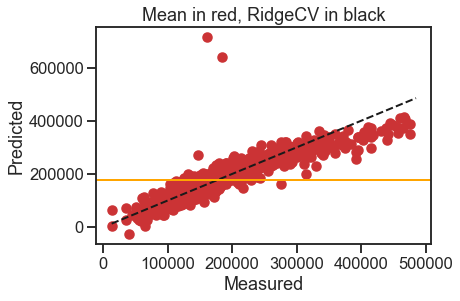

In [17]:
fig, ax = plt.subplots()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

sc = StandardScaler()
z_train = sc.fit_transform(x_train)
z_test = sc.transform(x_test)


ax.scatter(y_train, ridge_predict)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='orange')
plt.title("Mean in red, RidgeCV in black")
plt.show()

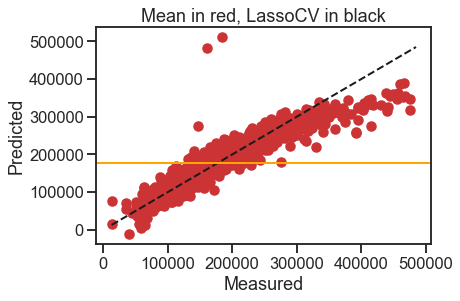

In [18]:
fig, ax = plt.subplots()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

sc = StandardScaler()
z_train = sc.fit_transform(x_train)
z_test = sc.transform(x_test)


ax.scatter(y_train, lasso_predict)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='orange')
plt.title("Mean in red, LassoCV in black")
plt.show()

In [19]:
print(len(lr_coef))
print(len(ridge_coef))
print(len(lasso_coef))

46
46
46


In [20]:
#coef_table = pd.DataFrame(list(x.columns)).copy()
#coef_table

## Looking at the coefficient from all models, let's try to pick the best 10 features. Start with Linear Regression. 

In [21]:
lr_coefficient = sorted(zip(map(lambda x: round(x, 4), lr_coef), 
                 x.columns), reverse=True)[:10]

print(lr_coefficient)

[(22360.5411, 'gr_liv_area'), (13674.8418, 'overall_qual'), (11850.8327, 'neighborhood'), (6964.0729, 'kitchen_qual'), (6926.4105, 'fireplace_qu'), (5989.0308, 'bsmt_exposure'), (5799.6152, '1st_flr_sf'), (5575.1921, 'exter_qual'), (5542.5883, 'garage_cars'), (5393.5769, 'garage_area')]


In [22]:
lr_10_best=[k[1] for k in sorted(lr_coefficient, key = lambda x : x, reverse = True)[:10]]

In [23]:
print(lr_10_best)

['gr_liv_area', 'overall_qual', 'neighborhood', 'kitchen_qual', 'fireplace_qu', 'bsmt_exposure', '1st_flr_sf', 'exter_qual', 'garage_cars', 'garage_area']


## Looking at coefficient from RidgeCV

In [24]:
ridge_coefficient = sorted(zip(map(lambda x: round(x, 4), ridge_coef), 
                 x.columns), reverse=True)[:10]

print(ridge_coefficient)

[(11010.8208, 'overall_qual'), (9535.0051, 'neighborhood'), (9334.0931, 'gr_liv_area'), (7426.5488, '1st_flr_sf'), (7075.4782, 'kitchen_qual'), (5989.097, 'exter_qual'), (5303.8825, 'fireplace_qu'), (5038.5774, 'garage_cars'), (4893.5038, 'garage_area'), (4748.9522, 'bsmt_exposure')]


In [25]:
ridge_coefficient2 = sorted(zip(map(lambda x: round(x, 4), ridge_coef), 
                 x.columns), reverse=True)

print(ridge_coefficient2)

[(11010.8208, 'overall_qual'), (9535.0051, 'neighborhood'), (9334.0931, 'gr_liv_area'), (7426.5488, '1st_flr_sf'), (7075.4782, 'kitchen_qual'), (5989.097, 'exter_qual'), (5303.8825, 'fireplace_qu'), (5038.5774, 'garage_cars'), (4893.5038, 'garage_area'), (4748.9522, 'bsmt_exposure'), (3708.1953, 'mas_vnr_area'), (3685.7758, 'full_bath'), (3535.7757, 'bsmt_full_bath'), (3413.9419, '2nd_flr_sf'), (3296.2621, 'overall_cond'), (2727.9771, 'totrms_abvgrd'), (2534.5609, 'exterior_3rd'), (2504.9971, 'functional'), (2014.809, 'bsmtfin_sf_merged'), (1997.4786, 'bsmtfin_type_merged'), (1926.7911, 'lot_area'), (1907.6319, 'fireplaces'), (1899.8693, 'bsmt_qual_cond_merged'), (1775.1445, 'half_bath'), (1470.116, 'year_remod/add'), (1296.7204, 'heating_qc'), (1102.1668, 'utilities'), (905.1757, 'bldg_type_2fmCon'), (741.9685, 'total_bsmt_sf'), (605.2343, 'bldg_type_1Fam'), (515.0642, 'exter_cond'), (147.4282, 'condition_3'), (13.9126, 'bldg_type_TwnhsE'), (4.86, 'lot_shape'), (-572.9146, 'lot_fronta

In [26]:
ridge_feature2 = pd.DataFrame(data = ridge_coefficient2, columns = ['Values', 'Features'])
ridge_feature2

,Values,Features
0,11010.8208,overall_qual
1,9535.0051,neighborhood
2,9334.0931,gr_liv_area
3,7426.5488,1st_flr_sf
4,7075.4782,kitchen_qual
5,5989.0970,exter_qual
6,5303.8825,fireplace_qu
7,5038.5774,garage_cars
8,4893.5038,garage_area
9,4748.9522,bsmt_exposure


In [27]:
ridge_10_best=[k[1] for k in sorted(ridge_coefficient, key = lambda x : x, reverse = True)[:10]]
print(ridge_10_best)

['overall_qual', 'neighborhood', 'gr_liv_area', '1st_flr_sf', 'kitchen_qual', 'exter_qual', 'fireplace_qu', 'garage_cars', 'garage_area', 'bsmt_exposure']


## Looking at Coefficient from LassoCV

In [28]:
lasso_coefficient = sorted(zip(map(lambda x: round(x, 4), lasso_coef), 
                 x.columns), reverse=True)[:10]

print(lasso_coefficient)

[(20444.4167, 'gr_liv_area'), (15886.6381, 'overall_qual'), (9688.2177, 'bsmtfin_sf_merged'), (8283.6859, 'total_bsmt_sf'), (7867.5881, 'exter_qual'), (7064.3264, 'kitchen_qual'), (6659.8802, 'neighborhood'), (5516.4051, 'bsmt_exposure'), (4546.4054, 'garage_area'), (3905.3038, 'lot_frontage')]


In [29]:
lasso_10_best=[k[1] for k in sorted(lasso_coefficient, key = lambda x : x, reverse = True)[:10]]
print(lasso_10_best)

['gr_liv_area', 'overall_qual', 'bsmtfin_sf_merged', 'total_bsmt_sf', 'exter_qual', 'kitchen_qual', 'neighborhood', 'bsmt_exposure', 'garage_area', 'lot_frontage']


### Now that we know the 10 best features for different models, let's pick out the unique of them all. Dont' forget the saleprice to include in the 2nd feature as well to be the y variable.

In [30]:
feature2 = (lasso_10_best + ridge_10_best + lr_10_best)

In [31]:
feature2 

['gr_liv_area',
 'overall_qual',
 'bsmtfin_sf_merged',
 'total_bsmt_sf',
 'exter_qual',
 'kitchen_qual',
 'neighborhood',
 'bsmt_exposure',
 'garage_area',
 'lot_frontage',
 'overall_qual',
 'neighborhood',
 'gr_liv_area',
 '1st_flr_sf',
 'kitchen_qual',
 'exter_qual',
 'fireplace_qu',
 'garage_cars',
 'garage_area',
 'bsmt_exposure',
 'gr_liv_area',
 'overall_qual',
 'neighborhood',
 'kitchen_qual',
 'fireplace_qu',
 'bsmt_exposure',
 '1st_flr_sf',
 'exter_qual',
 'garage_cars',
 'garage_area']

In [32]:
feature2 = feature1[['gr_liv_area','overall_qual','neighborhood','kitchen_qual', 'fireplace_qu', 'exter_qual', 
                     'bsmt_exposure', 'garage_cars', 'garage_area', 'bsmt_full_bath', '1st_flr_sf', 'saleprice']]

In [33]:
feature2.head()

,gr_liv_area,overall_qual,neighborhood,kitchen_qual,fireplace_qu,exter_qual,bsmt_exposure,garage_cars,garage_area,bsmt_full_bath,1st_flr_sf,saleprice
0,1479,6,2,4,0,4,1,2.0,475.0,0.0,725,130500
1,2122,7,3,4,3,4,1,2.0,559.0,1.0,913,220000
2,1057,5,2,4,0,3,1,1.0,246.0,1.0,1057,109000
3,1444,5,4,3,0,3,1,2.0,400.0,0.0,744,174000
4,1445,6,3,3,0,3,1,2.0,484.0,0.0,831,138500


In [34]:
feature2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2038 entries, 0 to 2037
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gr_liv_area     2038 non-null   int64  
 1   overall_qual    2038 non-null   int64  
 2   neighborhood    2038 non-null   int64  
 3   kitchen_qual    2038 non-null   int64  
 4   fireplace_qu    2038 non-null   int64  
 5   exter_qual      2038 non-null   int64  
 6   bsmt_exposure   2038 non-null   int64  
 7   garage_cars     2038 non-null   float64
 8   garage_area     2038 non-null   float64
 9   bsmt_full_bath  2038 non-null   float64
 10  1st_flr_sf      2038 non-null   int64  
 11  saleprice       2038 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 191.2 KB


In [35]:
feature2.describe()

,gr_liv_area,overall_qual,neighborhood,kitchen_qual,fireplace_qu,exter_qual,bsmt_exposure,garage_cars,garage_area,bsmt_full_bath,1st_flr_sf,saleprice
count,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.00000,2038.000000,2038.000000,2038.000000,2038.000000
mean,1491.537291,6.091757,2.439647,3.508342,1.748773,3.396958,1.618253,1.76791,470.631992,0.424436,1158.401374,179116.767419
std,491.280121,1.406877,0.921056,0.657780,1.802928,0.577716,1.071110,0.76150,213.526336,0.521442,389.339739,73759.679051
min,334.000000,1.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,334.000000,12789.000000
25%,1127.250000,5.000000,2.000000,3.000000,0.000000,3.000000,1.000000,1.00000,317.500000,0.000000,879.000000,129500.000000
50%,1441.500000,6.000000,2.000000,3.000000,1.000000,3.000000,1.000000,2.00000,480.000000,0.000000,1092.000000,161500.000000
75%,1724.750000,7.000000,3.000000,4.000000,4.000000,4.000000,2.000000,2.00000,576.000000,1.000000,1392.000000,213000.000000
max,5642.000000,10.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.00000,1418.000000,3.000000,5095.000000,485000.000000


## Let's go through the model again to find out the best feature.

In [36]:
feature2.shape

(2038, 12)

In [37]:
x2 = feature2.drop(columns = 'saleprice') 
y2 = feature2['saleprice']

In [38]:
model(x2,y2)

==========Linear Regression==========
MSE on training set: 897323600.6347318
MSE on testing set: 770047340.6714557
R^2 on training set: 0.8288438307427699
R^2 on testing set: 0.8684021198890712
LR RMSE:27749.726857600883
LR SCORE_TRAIN:0.8288438307427699
LR SCORE_TEST:0.8684021198890712
==========Ridge Regression==========
RIDGE ALPHA:148.4968262254465
RIDGE SCORE_TRAIN:0.8278826688469308
RIDGE SCORE_TEST:0.8659976432107849
RIDGE RMSE_TRAIN:30039.352553061613
RIDGE RMSE_TEST:28002.092400471854
==========Lasso Regression==========
LASSO ALPHA:335.1602650938841
LASSO SCORE_TRAIN:0.8182223293214362
LASSO SCORE_TEST:0.8772051695897305
LASSO RMSE_TRAIN:30870.846145603413
LASSO_RMSE_TEST:26805.524402054336


(array([17378.39646573, 16382.0705986 , 13097.39191029,  8743.13316384,
         7185.98758683,  5710.16302123,  6180.41531075,  3469.03952106,
         5794.70799732,  5404.88583716,  4495.72728982]),
 array([15654.29485609, 14853.24505666, 12094.30621031,  8765.68649458,
         7399.5555592 ,  6752.7418029 ,  5921.13435508,  4692.92988866,
         5368.88158101,  4979.46265321,  5389.53206918]),
 array([21468.26217159, 18056.01064199,  7784.0676458 ,  9214.86240624,
         4218.64979844,  7128.47127466,  6991.52838859,    -0.        ,
         7211.19536256,  7908.6476472 ,  7743.4931848 ]),
 array([163584.37633106, 142502.65048921, 262551.95643206, ...,
        243008.00378532, 189876.55611399, 254754.13590074]),
 array([161331.90181317, 153198.4892047 , 246502.1933191 , ...,
        248583.98345395, 193298.67192164, 264321.22743145]))

In [39]:
#Just running this again to compare with the 2nd model run.
model(x,y)

==========Linear Regression==========
MSE on training set: 773031900.8990148
MSE on testing set: 708681010.5826408
R^2 on training set: 0.8525513217551397
R^2 on testing set: 0.8788893698584481
LR RMSE:26621.06328798008
LR SCORE_TRAIN:0.8525513217551397
LR SCORE_TEST:0.8788893698584481
==========Ridge Regression==========
RIDGE ALPHA:265.6087782946687
RIDGE SCORE_TRAIN:0.8461943895018165
RIDGE SCORE_TEST:0.8802359848712134
RIDGE RMSE_TRAIN:28396.469968905018
RIDGE RMSE_TEST:26472.651337511605
==========Lasso Regression==========
LASSO ALPHA:335.1602650938841
LASSO SCORE_TRAIN:0.8144203639753176
LASSO SCORE_TEST:0.9052659439599033
LASSO RMSE_TRAIN:31192.014610856604
LASSO_RMSE_TEST:23544.38398369649


(array([-10895.31857558,  -2324.96051449,   2057.3289692 ,    624.81742338,
          1537.48867341,  11850.83266746,  13674.84183459,   4731.45654869,
          -798.21326417,   3446.07737414,   5575.19211739,    363.89387575,
          5989.03076513,  -6457.96034586,    786.62452338,  -1843.31253339,
          5799.61522761,  -1539.1249413 ,  22360.54114121,   4284.6499069 ,
          -699.49254422,   2532.11298052,   1485.7584186 ,  -1208.30599448,
         -1668.67198744,   6964.0728563 ,   -226.50731908,   3214.07881701,
          -912.02057148,   6926.41053702,   5542.58827719,   5393.57691485,
          1591.01611925,  -4468.16652648,  -1022.69810017,    -42.53290109,
         -2028.96727978,   3625.18429514,   -362.67215306,    309.22114794,
           856.85475327,   2870.98468878,   3469.71772833,   1945.22269268,
          2160.8985635 ,  -3456.32175506]),
 array([-3.81361215e+03, -5.72914573e+02,  1.92679112e+03,  4.85996022e+00,
         1.10216677e+03,  9.53500512e+03,  1

In [40]:
# i want to know the coefficient of the best 10 feature

lr_coefficient = sorted(zip(map(lambda x2: round(x2, 4), lr_coef), 
                 x.columns), reverse=True)[:10]

print(lr_coefficient)

[(22360.5411, 'gr_liv_area'), (13674.8418, 'overall_qual'), (11850.8327, 'neighborhood'), (6964.0729, 'kitchen_qual'), (6926.4105, 'fireplace_qu'), (5989.0308, 'bsmt_exposure'), (5799.6152, '1st_flr_sf'), (5575.1921, 'exter_qual'), (5542.5883, 'garage_cars'), (5393.5769, 'garage_area')]


In [41]:
lr_feature = pd.DataFrame(data = lr_coefficient, columns = ['Values', 'Features'])
lr_feature

,Values,Features
0,22360.5411,gr_liv_area
1,13674.8418,overall_qual
2,11850.8327,neighborhood
3,6964.0729,kitchen_qual
4,6926.4105,fireplace_qu
5,5989.0308,bsmt_exposure
6,5799.6152,1st_flr_sf
7,5575.1921,exter_qual
8,5542.5883,garage_cars
9,5393.5769,garage_area


In [42]:
ridge_coefficient = sorted(zip(map(lambda x2: round(x2, 4), ridge_coef), 
                 x.columns), reverse=True)[:10]

print(ridge_coefficient)

[(11010.8208, 'overall_qual'), (9535.0051, 'neighborhood'), (9334.0931, 'gr_liv_area'), (7426.5488, '1st_flr_sf'), (7075.4782, 'kitchen_qual'), (5989.097, 'exter_qual'), (5303.8825, 'fireplace_qu'), (5038.5774, 'garage_cars'), (4893.5038, 'garage_area'), (4748.9522, 'bsmt_exposure')]


In [43]:
ridge_feature = pd.DataFrame(data = ridge_coefficient, columns = ['Values', 'Features'])

In [44]:
lasso_feature = pd.DataFrame(data = lasso_coefficient, columns = ['Values', 'Features'])
lasso_feature

,Values,Features
0,20444.4167,gr_liv_area
1,15886.6381,overall_qual
2,9688.2177,bsmtfin_sf_merged
3,8283.6859,total_bsmt_sf
4,7867.5881,exter_qual
5,7064.3264,kitchen_qual
6,6659.8802,neighborhood
7,5516.4051,bsmt_exposure
8,4546.4054,garage_area
9,3905.3038,lot_frontage


In [45]:
ridge_feature

,Values,Features
0,11010.8208,overall_qual
1,9535.0051,neighborhood
2,9334.0931,gr_liv_area
3,7426.5488,1st_flr_sf
4,7075.4782,kitchen_qual
5,5989.0970,exter_qual
6,5303.8825,fireplace_qu
7,5038.5774,garage_cars
8,4893.5038,garage_area
9,4748.9522,bsmt_exposure


### This is the best 10 features from using Linear Regression model.

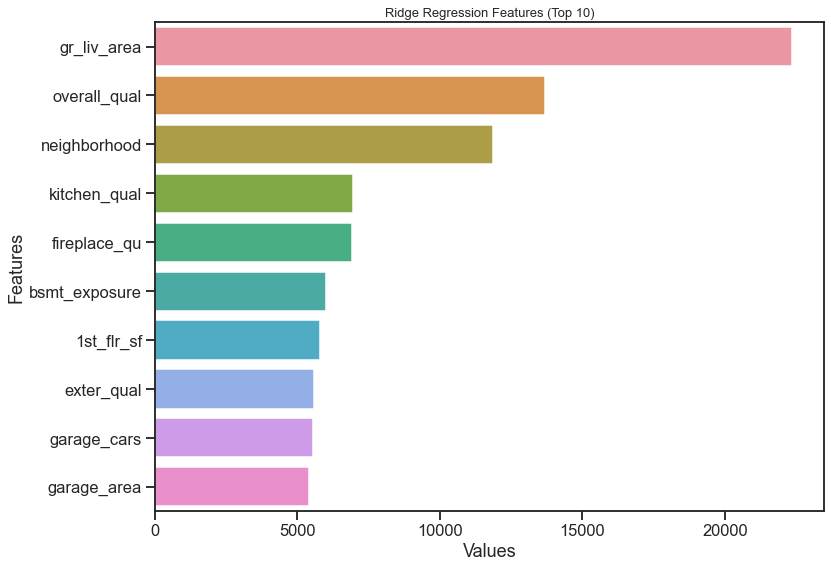

In [46]:
plt.figure(figsize = (12,9))
sns.barplot(y = 'Features',
            x = 'Values',
            data = lr_feature)
plt.title('Ridge Regression Features (Top 10)' , fontsize = 13)
plt.show()

### This is the best 10 features from RidgeCV

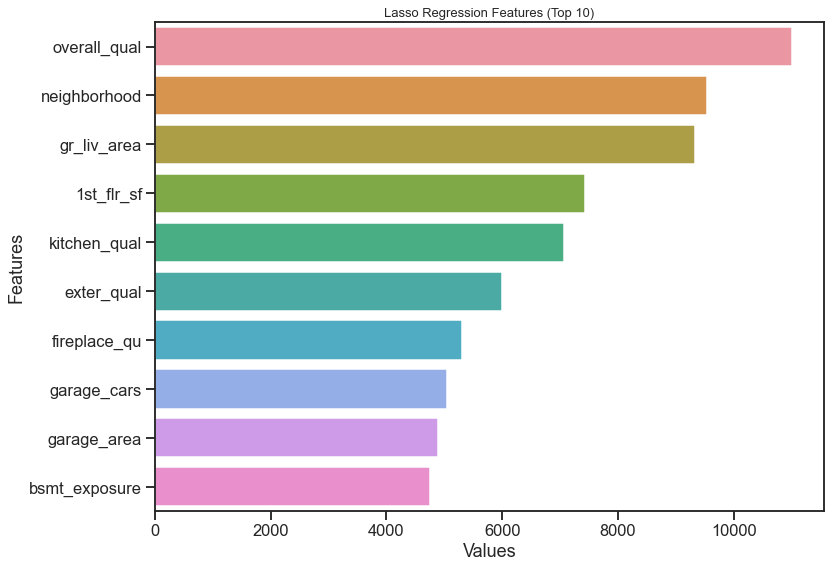

In [47]:
plt.figure(figsize = (12,9))
sns.barplot(y = 'Features',
            x = 'Values',
            data = ridge_feature)
plt.title('Lasso Regression Features (Top 10)' , fontsize = 13)
plt.show()

### This is the best 10 features from LassoCV

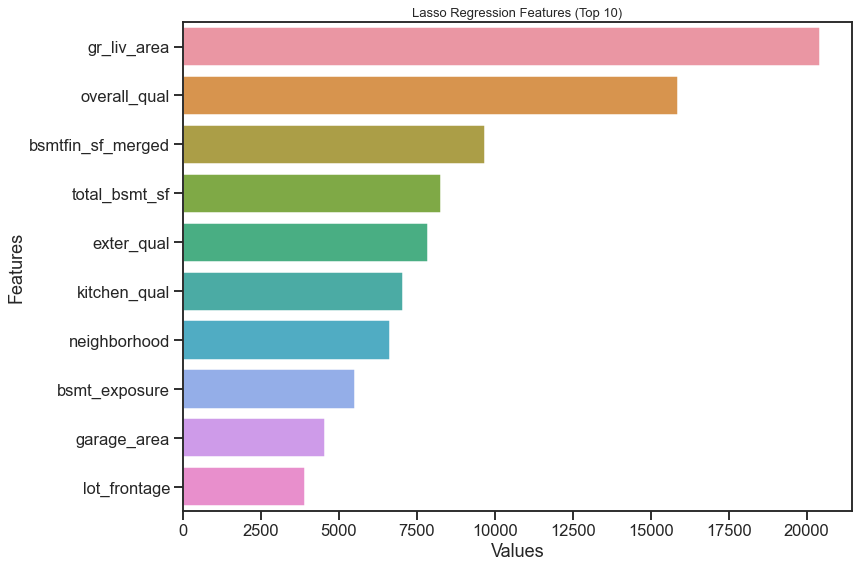

In [48]:
plt.figure(figsize = (12,9))
sns.barplot(y = 'Features',
            x = 'Values',
            data = lasso_feature)
plt.title('Lasso Regression Features (Top 10)' , fontsize = 13)
plt.show()